## Imports

In [133]:
import warnings
warnings.filterwarnings('ignore')
#Ignore future version warning (version warning)

In [134]:
#import modules
import sklearn as sk
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# REGRESSION

## Data handling

In [135]:
data = pd.read_csv("winequality-red.csv")

In [136]:
# clean data
df = preprocessing.normalize(data)
df = pd.DataFrame(d, columns=data.columns)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.106989,0.012071,0.000000,0.035663,0.001344,0.342913,0.919006,0.013673,0.043893,0.009327,0.134422,0.068583
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.173611,0.004340,0.008681,0.029452,0.001163,0.263517,0.930059,0.015470,0.048983,0.008991,0.151910,0.093006
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728


In [137]:
 #Seperate dependant and independant variable
data_input=df.drop(['quality'],axis=1).values
data_output=df['quality'].values

## Linear Regression

In [138]:
#Split dataset
x_train,x_test,y_train,y_test=train_test_split(data_input,data_output,test_size=0.3,random_state=1)

In [139]:
#Train model
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [140]:
y_pred=ml.predict(x_test)

In [141]:
##Evaluation of Linear regression

In [143]:
#Eval on hyper-parameters of LinearRegression
gs_LinearRegression = GridSearchCV(LinearRegression(),{
    'fit_intercept': [False,True], #Default = False
    'n_jobs': [0,1,10,50],
}, cv=10, return_train_score=False, scoring = 'accuracy')
gs_LinearRegression.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': [False, True],
                         'n_jobs': [0, 1, 10, 50]},
             scoring='accuracy')

In [144]:
dfgs = pd.DataFrame(gs_LinearRegression.cv_results_)
dfgs[['param_fit_intercept','param_n_jobs', 'mean_test_score']]
#Having 'param_fit_intercept' = True improves accuracy

,param_fit_intercept,param_n_jobs,mean_test_score
0,False,0,NaN
1,False,1,NaN
2,False,10,NaN
3,False,50,NaN
4,True,0,NaN
5,True,1,NaN
6,True,10,NaN
7,True,50,NaN


## Support Vector Machines

In [145]:
Xs_train, Xs_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.3, random_state=1)

clf = SVR(C=1.0, kernel='rbf', degree=3)
clf.fit(Xs_train, y_train)

SVR()

In [146]:
##Evaluation of SVM

In [147]:
#Eval on hyper-parameters of LinearRegression
gs_SVM = GridSearchCV(SVR(),{
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], #default rbf
    'degree' : [2,3], #default = 3, only applys to kernel: poly
}, cv=10, return_train_score=False, scoring = 'neg_mean_squared_error')
gs_SVM.fit(Xs_train,y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'degree': [2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [148]:
dfgs = pd.DataFrame(gs_SVM.cv_results_)
dfgs[['param_kernel','param_degree', 'mean_test_score']]
#Having 'kernel : poly' with a degree of 2 improves the accuracy 

,param_kernel,param_degree,mean_test_score
0,linear,2,-0.002536
1,poly,2,-0.002099
2,rbf,2,-0.002511
3,sigmoid,2,-0.002698
4,linear,3,-0.002536
5,poly,3,-0.002475
6,rbf,3,-0.002511
7,sigmoid,3,-0.002698


## Decision Trees 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_input,data_output,test_size=.3,random_state=23)
from sklearn.tree import DecisionTreeRegressor 
DTR = DecisionTreeRegressor(random_state=1)
dtt = DTR.fit(X_train, y_train)
dtt

DecisionTreeRegressor(random_state=1)

In [17]:
gs_DTR = GridSearchCV(DecisionTreeRegressor(),{
    'criterion' : ['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter' : ['best','random'], 
}, cv=10, return_train_score=False, scoring = 'neg_mean_squared_error')
gs_DTR.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [18]:
dfgs = pd.DataFrame(gs_DTR.cv_results_)
dfgs[['param_criterion','param_splitter', 'mean_test_score']]

,param_criterion,param_splitter,mean_test_score
0,squared_error,best,-0.000632
1,squared_error,random,-0.000697
2,friedman_mse,best,-0.000656
3,friedman_mse,random,-0.000710
4,absolute_error,best,-0.000622
5,absolute_error,random,-0.000693
6,poisson,best,-0.000626
7,poisson,random,-0.000661


##  Multi-Layer Perceptron Neural Network.

In [19]:
mlp = MLPRegressor(max_iter=10000, activation='relu')
mlp

MLPRegressor(max_iter=10000)

In [20]:
x_train2,x_test2,y_train2,y_test2=train_test_split(data_input,data_output,test_size=0.3,random_state=1)

In [21]:
mlp.fit(x_train2,y_train2)

MLPRegressor(max_iter=10000)

In [22]:
y_pred2 = mlp.predict(x_test2)

In [23]:
#Eval on hyper-parameters of MLPRegressor
x_train2,x_test2,y_train2,y_test2=train_test_split(data_input,data_output,test_size=0.3,random_state=1)
gs_MLP = GridSearchCV( MLPRegressor(),{
    'activation': ['identity', 'logistic', 'tanh', 'relu'], #default =relu
    'solver': ['lbfgs','sgd','adam'] #default =adam
}, cv=5, return_train_score=False, scoring = 'neg_mean_squared_error')
gs_MLP.fit(x_train2,y_train2)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='neg_mean_squared_error')

In [24]:
dfgs = pd.DataFrame(gs_MLP.cv_results_)
dfgs[['param_activation','param_solver', 'mean_test_score']]
# activation = relu , solver = lbfgs yeilds best results

,param_activation,param_solver,mean_test_score
0,identity,lbfgs,-0.000534
1,identity,sgd,-0.007097
2,identity,adam,-0.000673
3,logistic,lbfgs,-0.000582
4,logistic,sgd,-0.006150
5,logistic,adam,-0.002242
6,tanh,lbfgs,-0.000558
7,tanh,sgd,-0.005261
8,tanh,adam,-0.000709
9,relu,lbfgs,-0.000481


In [25]:
gs_MLP2 = GridSearchCV( MLPRegressor(),{
    'solver': ['lbfgs'],
    'max_fun':[15000,20000,10000,25000] #default is 15000 and only applys to lbfgs
}, cv=5, return_train_score=False,scoring = 'neg_mean_squared_error' )
gs_MLP2.fit(x_train2,y_train2)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'max_fun': [15000, 20000, 10000, 25000],
                         'solver': ['lbfgs']},
             scoring='neg_mean_squared_error')

In [26]:
dfgs = pd.DataFrame(gs_MLP2.cv_results_)
dfgs[['param_max_fun', 'mean_test_score']]
#Default is best 

,param_max_fun,mean_test_score
0,15000,-0.000519
1,20000,-0.000495
2,10000,-0.000490
3,25000,-0.000513


# CLASSIFICATION

## Data Handling

In [27]:
# import classifcation data set
df=pd.read_csv('adult.csv', index_col=False)
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-num        0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native-country     583
Sum                  0
dtype: int64

Age                  AxesSubplot(0.125,0.798085;0.168478x0.0819149)
Fnlwgt            AxesSubplot(0.327174,0.798085;0.168478x0.0819149)
Education-num     AxesSubplot(0.529348,0.798085;0.168478x0.0819149)
Capital-gain      AxesSubplot(0.731522,0.798085;0.168478x0.0819149)
Capital-loss         AxesSubplot(0.125,0.699787;0.168478x0.0819149)
Hours-per-week    AxesSubplot(0.327174,0.699787;0.168478x0.0819149)
dtype: object

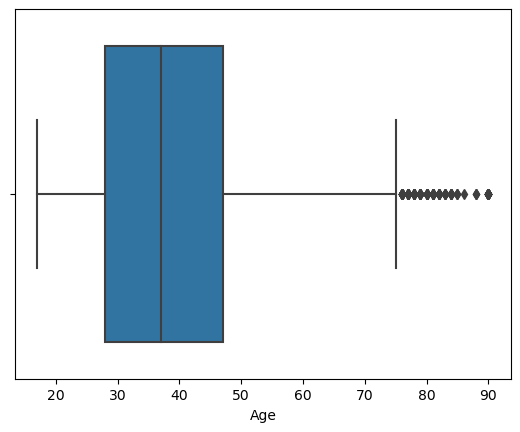

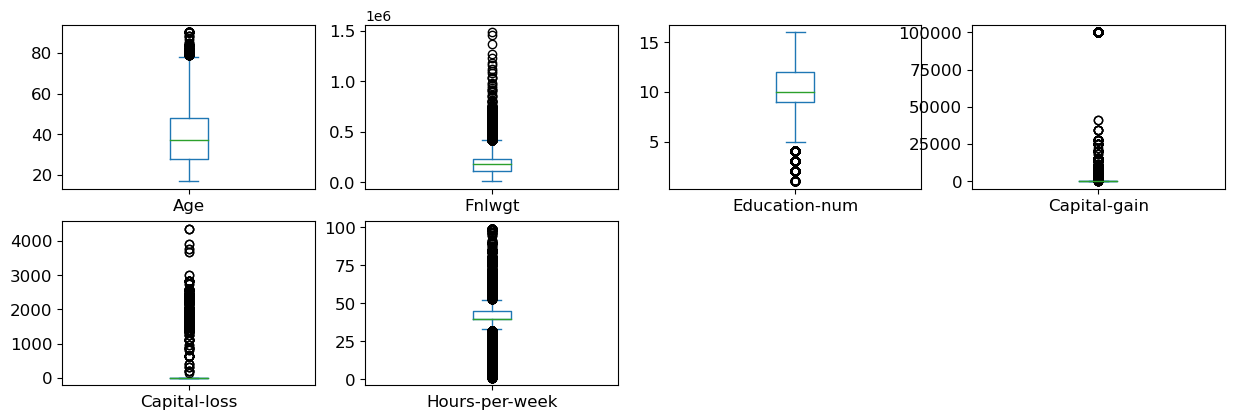

In [104]:
# clean data

dfclean = df.dropna() # Drops rows with empty values
dfclean.isnull().sum()
dfclean.loc[dfclean['Age'] > 80].shape[0]
dfclean[dfclean.Age >80].sum
sns.boxplot(dfclean['Age'])

data_mean = df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20))

In [105]:
dfclean.duplicated().sum()

23

In [106]:
dfdropd = dfclean.drop_duplicates()
dfdropd.duplicated().sum()

0

In [107]:
labelencoder = LabelEncoder()
dfcopy = dfdropd.copy()
#df1 = labelencoder.fit_transform(dfdropd['Sex'])
dfcopy['Race'] = labelencoder.fit_transform(dfcopy['Race'])
dfcopy['Sex'] = labelencoder.fit_transform(dfcopy['Sex'])
dfcopy['Occupation'] = labelencoder.fit_transform(dfcopy['Occupation'])
dfcopy['Relationship'] = labelencoder.fit_transform(dfcopy['Relationship'])
dfcopy['Marital-Status'] = labelencoder.fit_transform(dfcopy['Marital-Status'])
dfcopy['Education'] = labelencoder.fit_transform(dfcopy['Education'])
dfcopy['Workclass'] = labelencoder.fit_transform(dfcopy['Workclass'])
dfcopy['Native-country'] = labelencoder.fit_transform(dfcopy['Native-country'])
dfcopy['Sum'] = labelencoder.fit_transform(dfcopy['Sum'])
dfcopy

#dfcopy

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Sum
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [108]:
X = dfcopy[['Fnlwgt']]
# Normalise the features to use zero mean normalisation
# only for the first 10 features, but try yourself to visualise more features
scaler = StandardScaler()
dfcopy['Fnlwgt'] = scaler.fit_transform(X)
data = dfcopy
dfcopy

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Sum
0,39,5,-1.062676,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,-1.007829,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,0.244669,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,0.425206,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,1.406572,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,0.638926,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,-0.335246,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,-0.358567,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,2,0.110688,11,9,4,0,3,4,1,0,0,20,38,0


## Logistic Regression

In [109]:
# split X and y into training and test sets, test set 30% of data 
from sklearn.model_selection import train_test_split 

X = dfcopy.drop(columns = ['Sum'])
y = dfcopy['Sum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1, stratify=y)

from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(solver = 'newton-cg')

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

classifier_score = logreg.score(X_test, y_test )
print(classifier_score)

df_reduced = dfcopy.drop(columns = ['Capital-gain', 'Capital-loss', 'Education', 'Native-country', 'Race'])
# split into X and y
X1 = df_reduced.drop(columns = ['Sum'])
y1 = df_reduced['Sum']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,
random_state=1, stratify=y1)

logreg.fit(X1_train, y1_train)
y_pred = logreg.predict(X1_test)

print(classification_report(y_test, y_pred))

classifier_score = logreg.score(X1_test, y1_test )
print(classifier_score)

# try different argument for solver
logreg2 = LogisticRegression(solver = "liblinear")
logreg2.fit(X_train, y_train)

y_pred = logreg2.predict(X_test)
print(classification_report(y_test, y_pred))

classifier_score = logreg2.score(X_test, y_test )
print(classifier_score)

# try solver = liblinear on reduced features data 
logreg2.fit(X1_train, y1_train)
y_pred = logreg2.predict(X1_test)
print(classification_report(y1_test, y_pred))

classifier_score = logreg2.score(X1_test, y1_test )
print(classifier_score)
# dropping the features reduces the classification score and precision.
# differs from SVM where dropping the features increased classification score

# try k fold cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
# model with just 6 best features selected (k=6)
clf_fs_cv = Pipeline([
 ('feature_selector', SelectKBest(f_classif, k=6)),
 ('logreg', LogisticRegression(solver='liblinear'))
])
scores = cross_val_score(clf_fs_cv, X, y, cv=5) # 5 folds.
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6790
           1       0.72      0.46      0.56      2252

    accuracy                           0.82      9042
   macro avg       0.78      0.70      0.73      9042
weighted avg       0.81      0.82      0.81      9042

0.8216102632161026
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6790
           1       0.68      0.42      0.52      2252

    accuracy                           0.81      9042
   macro avg       0.75      0.68      0.70      9042
weighted avg       0.79      0.81      0.79      9042

0.8064587480645875
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6790
           1       0.73      0.45      0.56      2252

    accuracy                           0.82      9042
   macro avg       0.78      0.70      0.72      9042
weighted avg       0.81      0.82   

In [110]:
from sklearn.linear_model import LogisticRegression 

In [111]:
gs_LogisticReg = GridSearchCV(LogisticRegression(),{
    'penalty': ['none','l2','l1','elasticnet'] #default = l2
}, cv=5, return_train_score=False, scoring = 'accuracy')
gs_LogisticReg.fit(X1_train,y1_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['none', 'l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [112]:
dfgs = pd.DataFrame(gs_LogisticReg.cv_results_)
dfgs[['param_penalty', 'mean_test_score']]

,param_penalty,mean_test_score
0,none,0.799119
1,l2,0.799972
2,l1,NaN
3,elasticnet,NaN


In [115]:
gs_LogisticReg = GridSearchCV(LogisticRegression(),{
    'solver' : ['newton-cg','lbfgs','liblinear','sag','saga'],
    'fit_intercept' : [True,False], #default = l2
}, cv=5, return_train_score=False, scoring = 'accuracy')
gs_LogisticReg.fit(X1_train,y1_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [116]:
dfgs = pd.DataFrame(gs_LogisticReg.cv_results_)
dfgs[['param_fit_intercept','param_solver', 'mean_test_score']]

,param_fit_intercept,param_solver,mean_test_score
0,True,newton-cg,0.799972
1,True,lbfgs,0.799972
2,True,liblinear,0.800351
3,True,sag,0.799782
4,True,saga,0.796986
5,False,newton-cg,0.770442
6,False,lbfgs,0.770537
7,False,liblinear,0.770442
8,False,sag,0.770442
9,False,saga,0.770442


In [117]:
gs_LogisticReg = GridSearchCV(LogisticRegression(),{
    'solver' : ['newton-cg'],
    #default for fit_intercept = True
    'multi_class' : ['auto','ovr','multinomial']
}, cv=5, return_train_score=False, scoring = 'accuracy')
gs_LogisticReg.fit(X1_train,y1_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['newton-cg']},
             scoring='accuracy')

In [118]:
dfgs = pd.DataFrame(gs_LogisticReg.cv_results_)
dfgs[['param_multi_class', 'mean_test_score']]

,param_multi_class,mean_test_score
0,auto,0.799972
1,ovr,0.799972
2,multinomial,0.799972


## Support Vector Machines

In [119]:
# split into X and y
X = dfcopy.drop(columns = ['Sum'])
y = dfcopy['Sum']
# split X and y into training and test sets, test set 30% of data 
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85,
random_state=1, stratify=y)

In [120]:
# First try SVM with all features selected 
svclassifier = SVC(C=1.0,degree=3, gamma='auto', probability=True)
svclassifier.fit(X_train, y_train)

SVC(gamma='auto', probability=True)

In [121]:
y_pred = svclassifier.predict(X_test)

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     19239
           1       0.64      0.20      0.30      6380

    accuracy                           0.77     25619
   macro avg       0.71      0.58      0.58     25619
weighted avg       0.75      0.77      0.72     25619



In [123]:
classifier_score = svclassifier.score(X_test, y_test)
print(f"Classifier Score is {classifier_score}")

Classifier Score is 0.7727467894921738


In [124]:
# Try dropping features
# Drop Capital-gain and capital-loss due to low variability 
# Drop Education due to Education-num encoding similar data 
# Drop Native-country for low variability (mostly U.S)
# Drop Race for having lowest Chi-Squared statistic 

df_reduced = dfcopy.drop(columns = ['Capital-gain', 'Capital-loss', 'Education', 'Native-country', 'Race'])
df_reduced.head()

,Age,Workclass,Fnlwgt,Education-num,Marital-Status,Occupation,Relationship,Sex,Hours-per-week,Sum
0,39,5,-1.062676,13,4,0,1,1,40,0
1,50,4,-1.007829,13,2,3,0,1,13,0
2,38,2,0.244669,9,0,5,1,1,40,0
3,53,2,0.425206,7,2,5,0,1,40,0
4,28,2,1.406572,13,2,9,5,0,40,0


In [125]:
# split into X and y
X1 = df_reduced.drop(columns = ['Sum'])
y1 = df_reduced['Sum']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.85,
random_state=1, stratify=y1)

In [126]:
svclassifier = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=True)
svclassifier.fit(X1_train, y1_train)

SVC(gamma='auto', probability=True)

In [127]:
y1_pred = svclassifier.predict(X1_test)

In [128]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     19239
           1       0.67      0.37      0.48      6380

    accuracy                           0.80     25619
   macro avg       0.75      0.66      0.68     25619
weighted avg       0.78      0.80      0.78     25619



In [129]:
## precision for 0 (<=50k) has increased however the precision for 1 (50k >) has decreased
classifier_score1 = svclassifier.score(X1_test, y1_test)
print(f"Classifier Score is {classifier_score1}")

Classifier Score is 0.7990553885787892


In [52]:
from sklearn.model_selection import cross_validate

In [53]:
print(cross_validate(SVC(),X1_train,y1_train,cv=5,scoring = 'accuracy'))


{'fit_time': array([0.2975471 , 0.30068302, 0.30253196, 0.2948513 , 0.29660344]), 'score_time': array([0.13142776, 0.13324046, 0.13244057, 0.14022803, 0.13113117]), 'test_score': array([0.79756637, 0.79424779, 0.78871681, 0.77986726, 0.79535398])}


## Decision Trees

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Sum',axis=1), data['Sum'], test_size=.3,random_state=23)
clf = RandomForestClassifier(random_state=1, max_depth=10)
dtt = clf.fit(X_train, y_train)
predictions = dtt.predict(X_test)
print(accuracy_score(y_test, predictions))



0.8493696084936961


In [55]:
gs_RFC = GridSearchCV(RandomForestClassifier(),{
    'criterion' : ['gini','entropy'],
    'max_features' : ['sqrt','log2']
}, cv=5, return_train_score=False, scoring = 'accuracy')
gs_RFC.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy')

In [56]:
dfgs = pd.DataFrame(gs_RFC.cv_results_)
dfgs[['param_criterion','param_max_features','mean_test_score']]

,param_criterion,param_max_features,mean_test_score
0,gini,sqrt,0.855192
1,gini,log2,0.853201
2,entropy,sqrt,0.853296
3,entropy,log2,0.853628


## Multi-Layer Perceptron Neural Network

In [57]:
X = dfcopy.drop(columns = ['Sum'])
y = dfcopy['Sum']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
mlpc = MLPClassifier(max_iter=2500, alpha=0.00001, hidden_layer_sizes=12, random_state=3)
mlpc.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=12, max_iter=2500, random_state=3)

In [58]:
gs_MLPC = GridSearchCV(MLPClassifier(),{
    'activation': ['identity','logistic','tanh','relu']
}, cv=5, return_train_score=False, scoring = 'accuracy')
gs_MLPC.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh',
                                        'relu']},
             scoring='accuracy')

In [59]:
dfgs = pd.DataFrame(gs_MLPC.cv_results_)
dfgs[['param_activation','mean_test_score']]

,param_activation,mean_test_score
0,identity,0.788880
1,logistic,0.836327
2,tanh,0.828459
3,relu,0.815471


In [60]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from sklearn.decomposition import PCA
X = data.drop('Sum',axis=1)
y = data['Sum']
features = list(X)
pca = PCA(n_components=10)
Xs_pca = pca.fit_transform(X)
Xs_pca=Xs_pca[:,0:5] #retain the first 5 PC
y.head()



X_train, X_test, y_train, y_test = train_test_split(Xs_pca, y, test_size=.2,random_state=23, stratify=y)





def build_model(hp):



   #
    model = keras.Sequential()
    model.add(keras.layers.Dense(5, input_dim=5,activation="relu"))    
    
    for i in range(1, hp.Int("num_layers", 2, 6)):
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu")
            )
        
        # Tune dropout layer with values from 0 - 0.3 with stepsize of 0.1.
        model.add(keras.layers.Dropout(hp.Float("dropout_" + str(i), 0, 0.3, step=0.1)))
    
    # Add output layer.
    model.add(keras.layers.Dense(units=10, activation="softmax"))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    # Define optimizer, loss, and metrics
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=["accuracy"])
    model.summary()
    return model
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)



tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')




tuner.search(X_train, y_train, epochs=5, validation_split=0.2, callbacks=[stop_early], verbose=2)



best_hps=tuner.get_best_hyperparameters()[0]
h_model = tuner.hypermodel.build(best_hps)
h_model.fit(X_train, y_train, epochs=25, validation_split=0.2, callbacks=[stop_early], verbose=2)



h_model.evaluate(X_test, y_test, return_dict=True)

ModuleNotFoundError: No module named 'keras_tuner'

## Analysis

In [61]:
# create df of the numerical values and Sum to create multiple boxplots

df_numerical = dfdropd[['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Sum']].copy()

df_numerical.head()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Sum
0,39,77516,13,2174,0,40,<=50K
1,50,83311,13,0,0,13,<=50K
2,38,215646,9,0,0,40,<=50K
3,53,234721,7,0,0,40,<=50K
4,28,338409,13,0,0,40,<=50K


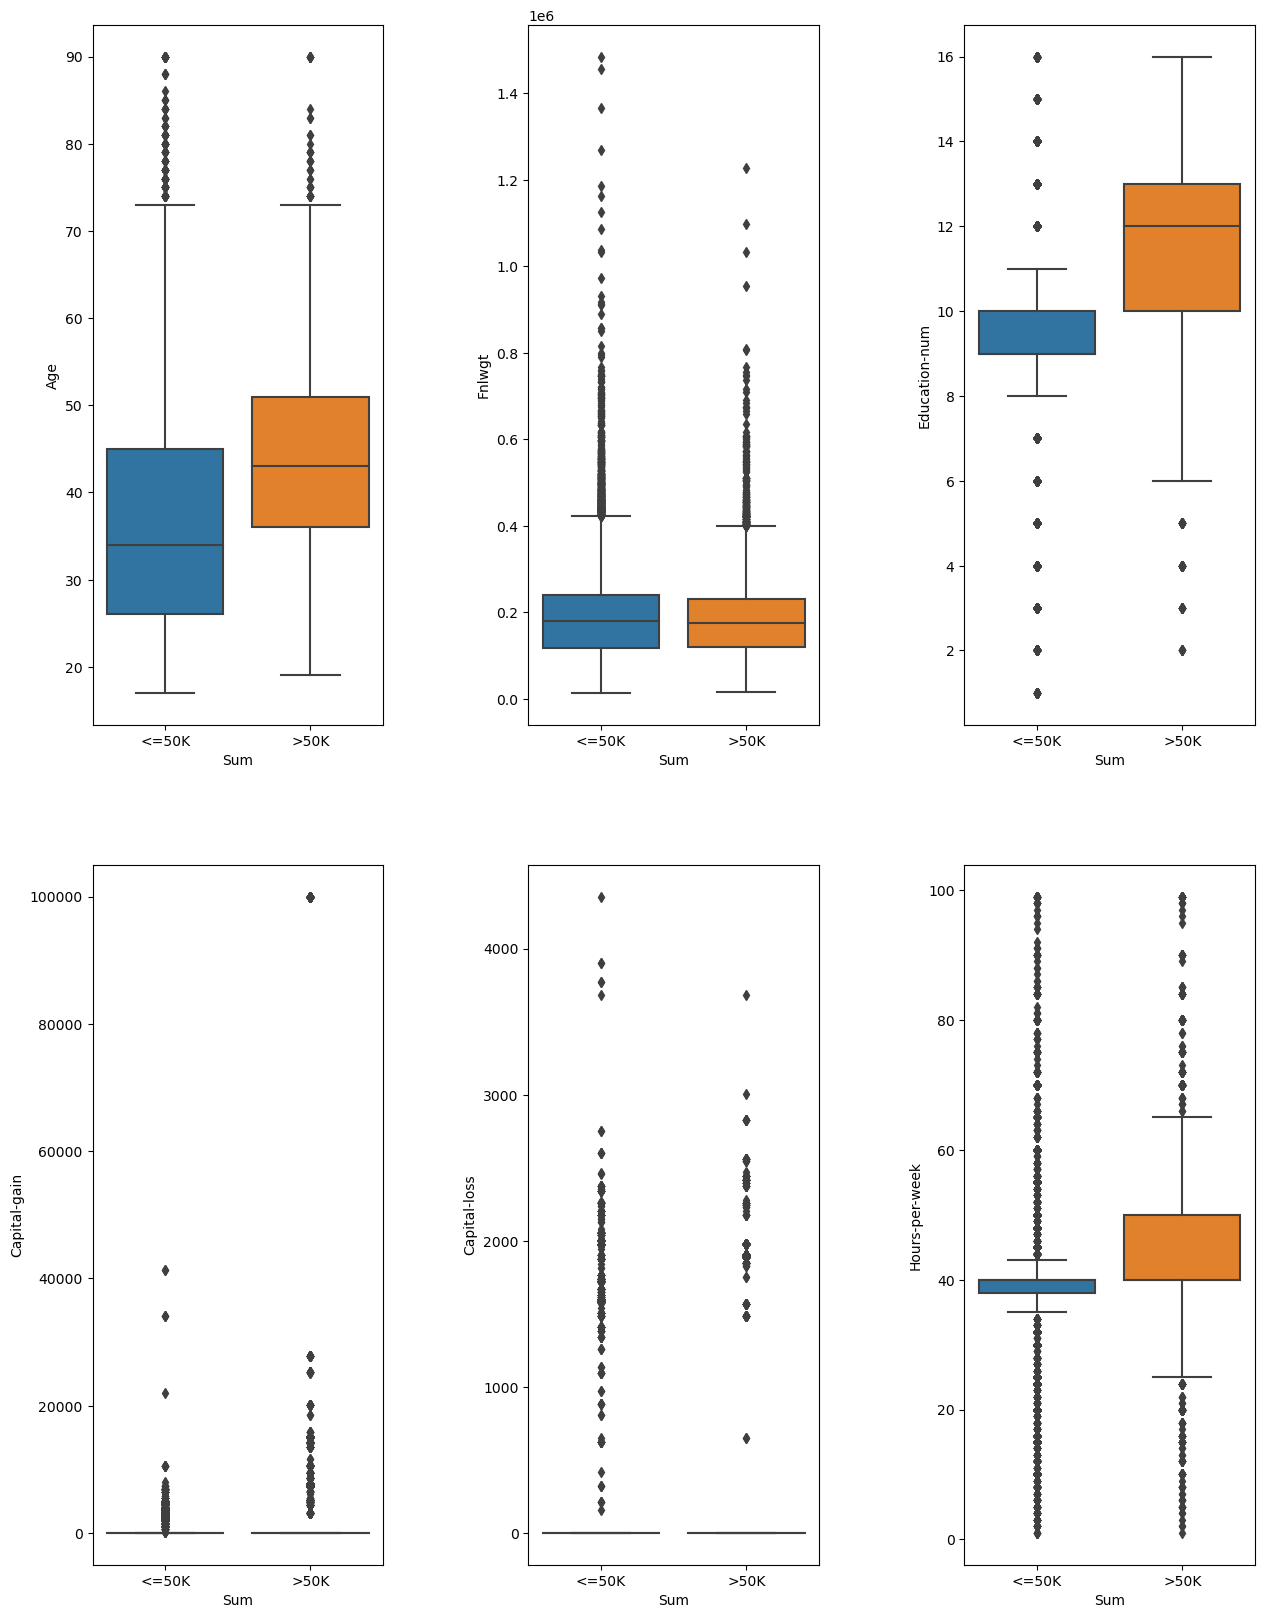

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,20))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()

for i, col in enumerate(df_numerical.columns[0:6]):
    _= sns.boxplot(y=col, x='Sum', data=df_numerical, ax=axes[i])

In [63]:
# from the boxplots it looks like fnlwgt is similar for both classes, so we may potentially drop that feature.
# also, captital-gain and capital-loss are mostly zero for both classes, so we could drop these as well due to low variability

#Now try to plot the categorical features 
#look at value counts first 

categorical_cols = ['Workclass', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native-country']

for col in categorical_cols:
    vals = dfdropd[[col]].value_counts()
    print(vals)
    
# data is skewed towards private sector, white race, males, and United States

Workclass       
Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
dtype: int64
Marital-Status       
Married-civ-spouse       14059
Never-married             9711
Divorced                  4212
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
dtype: int64
Occupation       
Prof-specialty       4034
Craft-repair         4025
Exec-managerial      3991
Adm-clerical         3719
Sales                3584
Other-service        3209
Machine-op-inspct    1964
Transport-moving     1572
Handlers-cleaners    1349
Farming-fishing       987
Tech-support          911
Protective-serv       644
Priv-house-serv       141
Armed-Forces            9
dtype: int64
Relationship  
Husband           12457
Not-in-family      7714
Own-child          4462
Unmarried          3211
Wife               1406
Other-

<AxesSubplot:xlabel='Sum', ylabel='Count'>

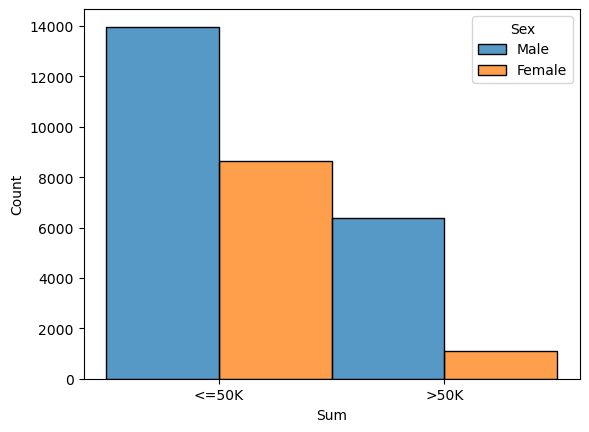

In [64]:
# will use histograms for all categorical features bar countries 
first_dim = 'Sum' 
second_dim = 'Sex'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# males tend to earn more than 50k however the data is skewed towards males 

<AxesSubplot:xlabel='Sum', ylabel='Count'>

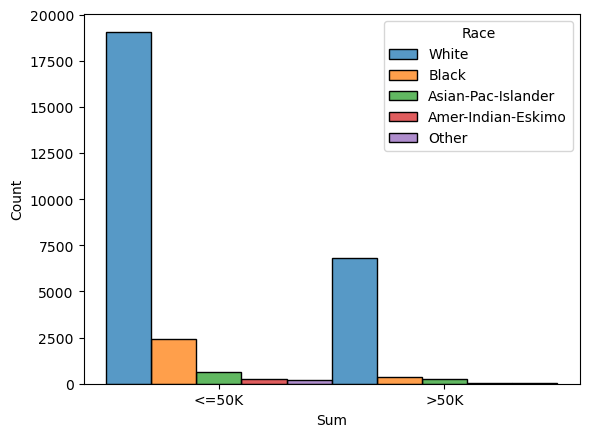

In [65]:
first_dim = 'Sum' 
second_dim = 'Race'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# again, data is heavily skewed towards White so hard to tell

<AxesSubplot:xlabel='Sum', ylabel='Count'>

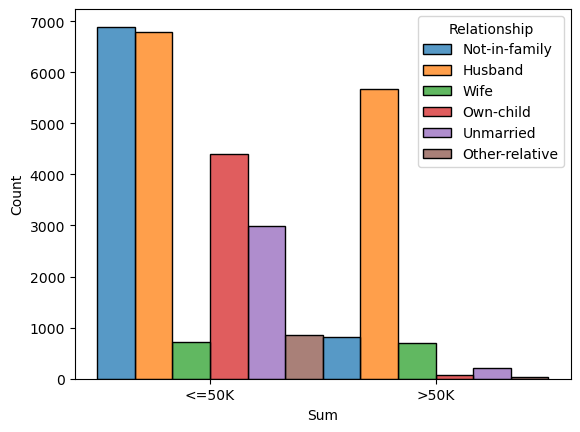

In [66]:
first_dim = 'Sum' 
second_dim = 'Relationship'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# can see husbands are more likely to earn over 50k, not-in-family and own child less likely - important feature

<AxesSubplot:xlabel='Sum', ylabel='Count'>

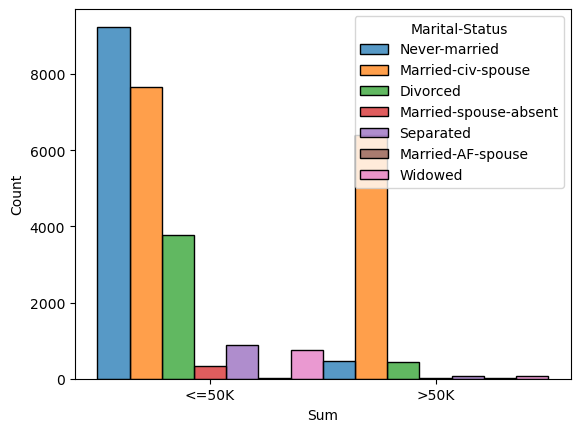

In [67]:
first_dim = 'Sum' 
second_dim = 'Marital-Status'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
# Married-civ-spouse most liekly to earn over 50k, never-married and divorsed less likely, rest of data is smaller 
# in comparison 

<AxesSubplot:xlabel='Sum', ylabel='Count'>

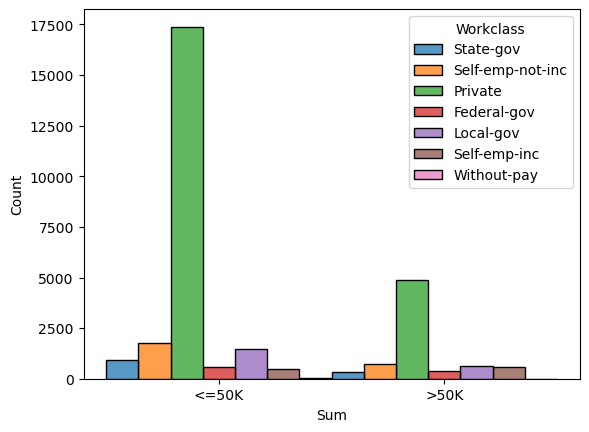

In [68]:
first_dim = 'Sum' 
second_dim = 'Workclass'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )
#data skewed towards private secotr so hard to make judgement, similar results for both classes

<AxesSubplot:xlabel='Sum', ylabel='Count'>

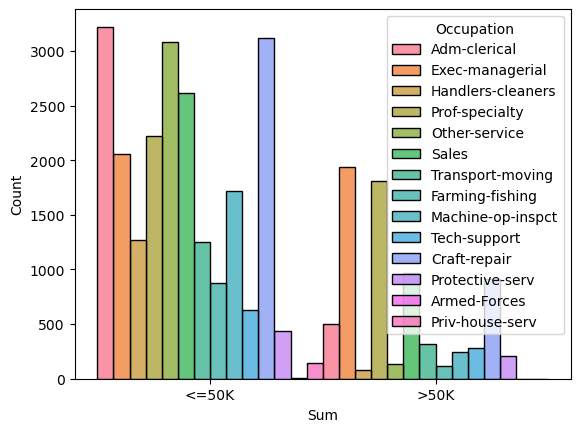

In [69]:
first_dim = 'Sum' 
second_dim = 'Occupation'

sns.histplot(binwidth = 1, x = first_dim, hue = second_dim, data = dfdropd, stat = 'count', multiple = 'dodge' )

# exec- managerial and prof-speciality both most likely to earn over 50k, data well spread out - important feature. 